In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
kill = pd.read_csv("/content/drive/MyDrive/data/PoliceKillingsUS.csv", encoding="windows-1252")

# **Pie Chart**

Pie plot seaborn'un değil matplotlib'in görselleştirilmesidir.

Polislerin öldürdüğü insanların ırklarının oranının çizdirilmesi amaçlanmaktadır.

In [3]:
kill.head() #manner_of_death -> nasıl öldürüldüğü
            #armed -> hangi silahla öldürüldüğü
            #öldürülen insanların ırklarının bilgisi
            #signs_of_mental_illness -> akıl hastalığının olduğunun işareti, bu sütun boolean değer barındırır.
            #threat_level -> saldırı türü
            #flee -> öldürülen insanın kaçıp kaçmadığının bilgisi

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [4]:
kill.race.value_counts() #hangi ırktan kaç tane olduğu yazdırılmıştır.
                         #W -> White
                         #B -> Black
                         #H -> Hispanic
                         #A -> African American
                         #N -> Native American
                         #O -> Others

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [5]:
kill.race.dropna(inplace = True) #race sütununda missing data varsa bu veriler inplace=True olduğundan kalıcı olarak çıkartılır.

In [6]:
labels = kill.race.value_counts().index #hangi ırktan kaç tane olduğunun bilgisi value_colunts methodu ile bulunur.
                                        #bunların indexi (W,B,H,A,N,O) alınıp labels adlı değişkene eşitlenir.

In [7]:
colors = ['grey','blue','red','yellow','green','brown'] #6 değer olduğundan 6 renk belirlenir.
                                                        #bu renkler pie chartın renkleridir.

In [8]:
explode = [0,0,0,0,0,0]  #explode adında bir liste tanımlanır.
                         #bu listede pie chartların oranı olacaktır.                               

In [9]:
sizes = kill.race.value_counts().values #hangi ırktan kaç tane olduğunun değerleri (1201,618,423,39,31,28) bulunur. 

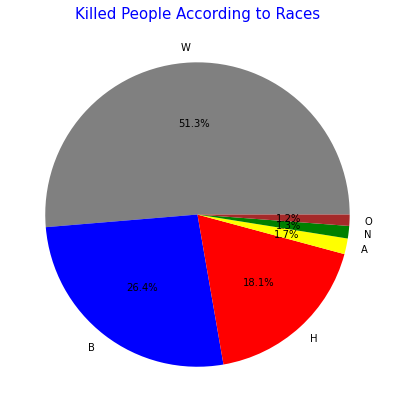

In [10]:
plt.figure(figsize = (7,7)) #7,7 boyutunda figür oluşturulur.
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%') 
#sizes -> değerler
#explode -> liste
#labels -> indeksler
#colors -> tanımlanan 6 adet renk
#autopct -> oranın ondalık kısmı belirlenir.
plt.title('Killed People According to Races',color = 'blue',fontsize = 15) #başlık verildi.
plt.show()

% 51.3 White, %26.4 Black olarak hesaplanmış, bu değerler sizes değişkeninde bulunan ırk sayılarından gelir. Pie plot explode parametresiyle kendi içinde bir orantı kurar ve her value'nun yüzdelik değerini bulur.

# **Box Plot**

manner_of_death (ölüm şekli)'e göre sınıflandırmak amaçlanmaktadır.
Aynı zamanda öldürülen insanların cinsiyet bilgisi ve yaşı da öğrenilmek istenmektedir.

In [11]:
kill.manner_of_death.value_counts() #iki tür ölüm şekli vardır.
                                    #shot -> ateş edilerek
                                    #shot and Tasered -> ateş edilerek ve şok tabancasıyla

shot                2363
shot and Tasered     172
Name: manner_of_death, dtype: int64

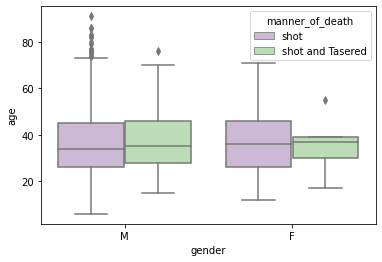

In [12]:
sns.boxplot(x="gender", y="age", hue="manner_of_death", data=kill, palette="PRGn")
#x ekseninde cinsiyet, y ekseninde yaş değerleri depolanır.
#seaborn x değişkeninde depolanan genderlardan unique olanları bulur.
#hue parametresi manner_of_death sütunundaki unique değerleri bulur, x ve y ekseninde classlarına ayırır.
#data olarak kill değişkenine aktarılan data seçilmiştir.
#palette ile renkler mor ve yeşil olarak belirlenir.
plt.show()

*   box plotta kutunun içindeki çizgi **median** değerini, kutunun kenarlarındaki çizgiler **lower quartile** ve **upper quartile** değerlerini verir. kısa çizgiler ise minimum ve maximum değerleridir.
*   **lower quartile** listedeki en küçük sayı ile listenin medianının ortasındaki sayıdır, first quantile (25%) olarak da adlandırılır. 
*   **Upper quartile** listenin medianı ile listedeki en büyük sayının ortasındaki sayıdır, third quantile (75%) olarak da adlandırılır.
*   Lower quartile(Q1) ile upper quartile(Q3) arasındaki mesafe **interquartile** range'dir, yani boxun uzunluğudur.
*   Minimum değerin altında ve maximum değerin üstünde kalan değerler **outlier**dır.
*   Boxplotta kutu ne kadar uzun olursa veri o kadar dağılmış demektir.







Bu data incelendiğinde male için silahla öldürülme durumunda maximum değerin üstünde birçok veri vardır.Bunlar outlierdır.

Kadınlarda şok tabancası ile öldürülenlerin sayısı çok da fazla değildir.

# **Swarm Plot**

manner_of_death (ölüm şekli)'e göre sınıflandırmak amaçlanmaktadır.
Aynı zamanda öldürülen insanların cinsiyet bilgisi ve yaşı da öğrenilmek istenmektedir.

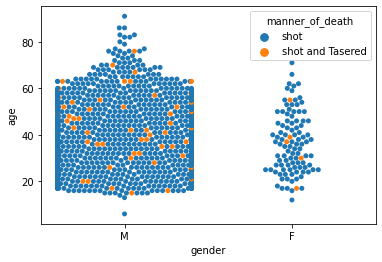

In [13]:
import warnings
warnings.filterwarnings('ignore') 

sns.swarmplot(x="gender", y="age",hue="manner_of_death", data=kill)
#x="gender" -> gender sütunundaki unique değerler bulunur (male,female)
#y="age" -> y eksenine yaşlar yazılır.
#hue="manner_of_death" -> öldürülme şekillerinden unique olanlar alınır.
#data=kill -> kill değişkeninde tutulan data kullanılacaktır.
plt.show()

Bu plotta cinsiyete bağlı olarak hangi yaşta nasıl öldürüldüğü açık bir şekilde görülmektedir.

Swarm plot classification algoritmalarında datanın ne şekilde ayrılacağının bilgisini net bir şekilde verir.

# **Count Plot**

Count plotta value_counts methoduyla bulunan değerlerin görselleştirilmesi yapılır.

In [14]:
kill.gender.value_counts() #hangi cinsiyetten kaç tane öldürüldüğü hesaplanır.

M    2428
F     107
Name: gender, dtype: int64

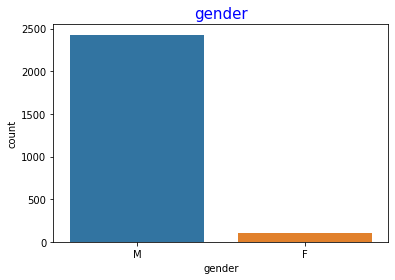

In [15]:
sns.countplot(kill.gender) #countplot ile value_counts methoduyla bulunan değerler görselleştirilir.
plt.title("gender",color = 'blue',fontsize=15)
plt.show()

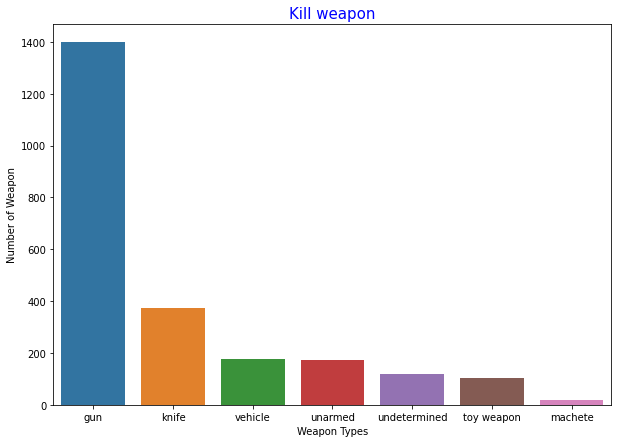

In [16]:
armed = kill.armed.value_counts() #hangi silahtan kaç tane kullanıldığı hesaplanır.
plt.figure(figsize=(10,7))
sns.barplot(x=armed[:7].index,y=armed[:7].values) #7 çeşit silah kullanıldığı için 7 tane bar belirlendi.
plt.ylabel('Number of Weapon')
plt.xlabel('Weapon Types')
plt.title('Kill weapon',color = 'blue',fontsize=15)
plt.show()

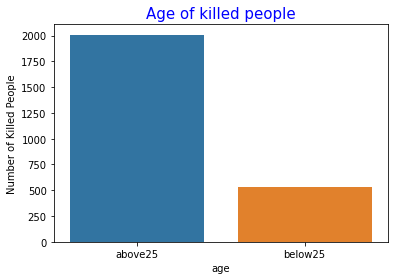

In [17]:
above25 =['above25' if i >= 25 else 'below25' for i in kill.age] #list comprehension ile filtre yapılır.
df = pd.DataFrame({'age':above25}) #polislerin öldürdüğü insanların yaşı 25'den büyük olanlar above25 olarak ayrıldı.
sns.countplot(x=df.age)
plt.ylabel('Number of Killed People')
plt.title('Age of killed people',color = 'blue',fontsize=15)
plt.show()

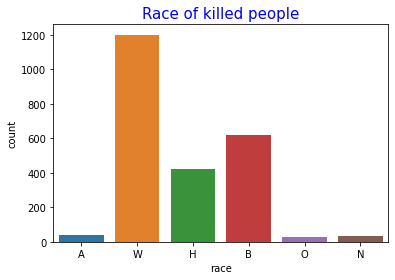

In [26]:
# Race of killed people
sns.countplot(data=kill, x='race') #hangi ırktan kaç tane olduğu countplot ile hesaplanıp görselleştirildi.
plt.title('Race of killed people',color = 'blue',fontsize=15)
plt.show()

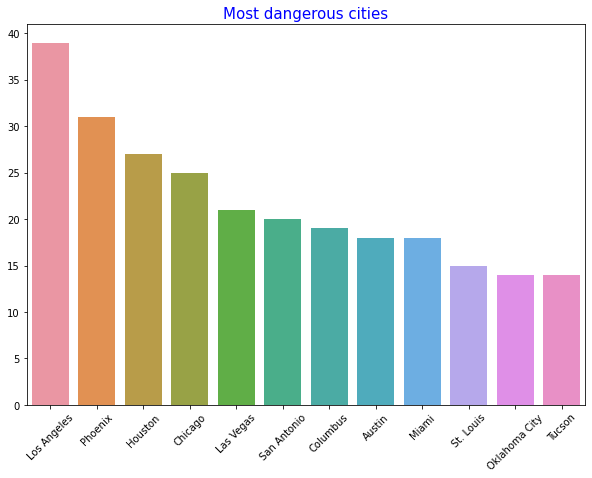

In [27]:
# Most dangerous cities -> polislerin en çok hangi şehirde insan öldürdüğü görselleştirilmek amaçlanmıştır.
city = kill.city.value_counts() #value_counts ile hangi şehirde kaç insan öldürüldüğü hesaplanmıştır.
plt.figure(figsize=(10,7)) #figür oluşturuldu.
sns.barplot(x=city[:12].index,y=city[:12].values) #x eksenine şehirlerin isimleri, y eksenine de değerleri yazılmıştır.
plt.xticks(rotation=45) #şehir isimleri 45 derecelik açıyla yazdırılmıştır.
plt.title('Most dangerous cities',color = 'blue',fontsize=15) #başlık verildi.
plt.show()

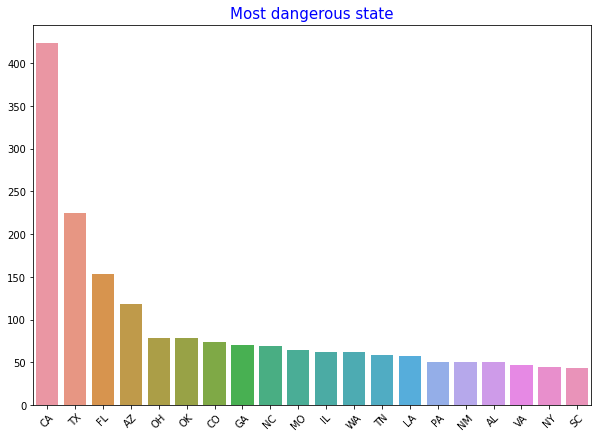

In [30]:
# most dangerous states -> polislerin en çok hangi eyalette insan öldürdüğü görselleştirilmek amaçlanmıştır.
state = kill.state.value_counts() #value_counts ile hangi eyalette kaç insan öldürüldüğü hesaplanmıştır.
plt.figure(figsize=(10,7)) #figür oluşturuldu.
sns.barplot(x=state[:20].index,y=state[:20].values) #x eksenine eyaletlerin isimleri, y eksenine de değerleri yazılmıştır.
plt.xticks(rotation=45) #eyalet isimleri 45 derecelik açıyla yazdırılmıştır.
plt.title('Most dangerous state',color = 'blue',fontsize=15) #başlık verildi.
plt.show()

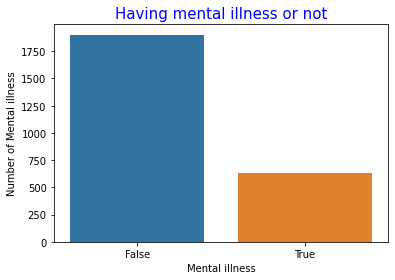

In [29]:
# Having mental ilness or not for killed people -> öldürülen insanların akıl hastalığı olup olmadığı görselleştirilmek amaçlanmıştır.
sns.countplot(kill.signs_of_mental_illness) #signs_of_mental_illness sütunu boolean değer barındırır. 
plt.xlabel('Mental illness')                #akıl hastalığı olanlar için True, olmayanlar için False değer dönecektir
plt.ylabel('Number of Mental illness')
plt.title('Having mental illness or not',color = 'blue', fontsize = 15)
plt.show()

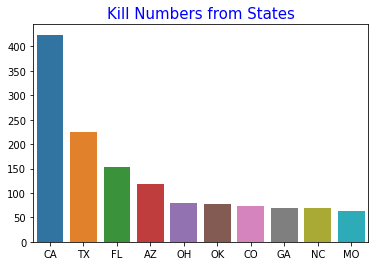

In [28]:
# Kill numbers from states in kill data
sta = kill.state.value_counts().index[:10] #hangi eyalette kaç kişinin öldürüldüğü value_counts ile hesaplanıp,en çok değer barındıran 10 tanesi seçilmiştir.
sns.barplot(x=sta,y = kill.state.value_counts().values[:10]) #x ekseninde eyaletlerin adı, y ekseninde değerleri yazdırılmıştır.
plt.title('Kill Numbers from States',color = 'blue',fontsize=15) #başlık verilmiştir.
plt.show()